# References
## McCurdy and Hamm 1994a
* Pair of MNs in the RC circuit: one is stimulated by injecting pulses of depolarizing current of 0.5 ms, ca. 7 Hz; Postsynaptic responses are recorded on the second impaled MN.
* Rostrocaudal distributions of recurrent inhibitory post-synaptic potentials amplitudes were obtained from pairs of motoneurons (Figure 3A). Amplitudes were determined from the difference between baseline level of activity in the resting membrane taken from the prestimulus period and the peak recurrent inhibitory post-synaptic potentials amplitude. This result obtained from all motoneurons, regardless of muscle innervated, but it is useful as an overall behavior.
* RIPSPs inversely correlated with distance between motoneurons (Kendall Tau correlation method, $\tau$=0.154, P=0.028 for MG)
* The distance that separated the 180 pairs of motoneurons measured ranged form 86 $\mu$m to 4.7 mm.
* Different mean value of significant recurrent inhibitory post-synaptic potentials of motoneurons in all pairs depending on whether they are distant or not. This classification is based on the boundary value of 1.0 mm, even though it is a debatable value, as discussed by the authors.
* Amplitudes and durations for this sample are comparable with those found by Hamm et al. (1987a).

## Uchiyama et al. (2003a)
* Number of Renshaw cells associated with the medial gastrocnemius $\alpha$ motoneuron pool is arbitrarily assumed to be 300, but it is not too far away from what has been studied in the literature.
* Topographic distribution according to a gaussian centered in the motoneuron and with standar deviation of 1/6 mm for motoneurons and 3.5/3 mm for Renshaw cells.

# Parameters adjusted
* Supposedly, the probability of connections and motoneuron conductances on Renshaw cells are the only parameters to be adjusted.

# Considerations
* The stimulation rate used by McCurdy and Hamm (1994a) does not allow for the motoneuron-Renshaw cell synapse to recover from the post-synaptic depression described in Hultborn and Pierrot-Deseiligny (1979). Therefore, amplitudes reported are probably underestimated.
* The distances considered in the simulations included the whole range available whithin 0 to 4.7 mm. Furthermore, only 180 pairs, randomly choosed, were considered. These made the simulation simpler and faster.
* For now, I am using a Renshaw cell density of 300 cells per 7 mm. I could change this density later to something similar to what was described in Cisi and Kohn (2008). The value of 7 mm used here is the length of the medial gastrocnemius neuronal column in the cat (it was 10 mm in Cisi work).

In [1]:
import sys
sys.path.append('Parametrizations/Population')
# Allows plots to be zoomed in, etc
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.interpolate import UnivariateSpline
import scipy.stats as stats

from simulator import simulator

In [2]:
nS = 4#75
nFR = 4#75
nFF = 8#150
nRC = 16#300
nMN = nS+nFR+nFF
params = 'final'

declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
# Values necessary to simulate the current quantities of neurons, but maintaing the density
MNposition = 7
RCposition = 7

boundary = 4.7
RIPSPs = []
distances = []

MNi = nMN/2
MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, MNi, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition)

peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
for j in range(nMN):
    # Ignore the MN stimulated
    if j == MNi:
        continue
    distance = positions[j] - positions[MNi]
    # Ignore recordings out of the boundary
    if abs(distance)>boundary:
        continue
    distances.append(distance)
    RIPSPs.append(peaks[j])

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 110 synapses were built
Synaptic Noise on RC_ext built
All the 16 synaptic noises were built


<IPython.core.display.Javascript object>


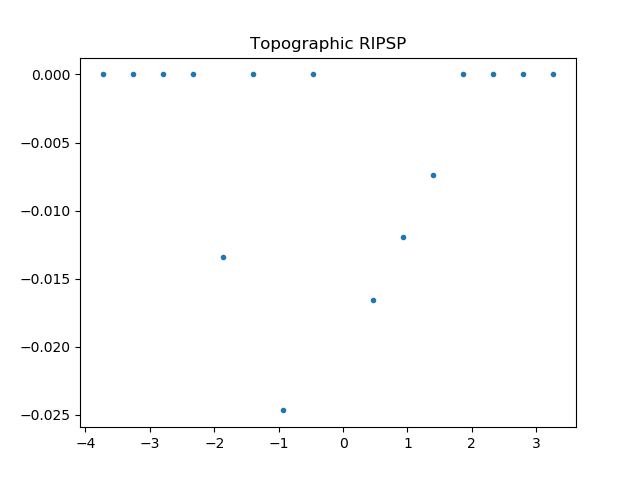

In [3]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.show()

In [13]:
nS = 75
nFR = 75
nFF = 150
nRC = 300
nMN = nS+nFR+nFF
MNidx = range(nMN)
params = 'final'

declinefactor_MN = 1/6.0
declinefactor_RC = 3.5/3
MNposition = 7
RCposition = 7

boundary = 4.7
RIPSPs = []
distances = []
# Choose randomly motoneurons to be stimulated
stimulated_MNs = np.random.choice(MNidx, 14, replace=False)

tic = time.clock()

for i in stimulated_MNs:
    MNsignal, RCsignal, t, positions = simulator(nS, nFR, nFF, nRC, i, params, declinefactor_MN, declinefactor_RC, MNposition, RCposition)
    peaks = [min(MNsignal[y,]) for y in range(MNsignal.shape[0])]
    
    available_MNs = [x for x in MNidx if x != i]
    recordedCount = 0
    while recordedCount < 13:
        # Random choice to get approximately 180 pairs (14*13=182)
        recorded_MN = np.random.choice(available_MNs)
        distance = positions[j] - positions[i]
        # Ignore recordings out of the boundary
        if abs(distance)>boundary:
            continue
        distances.append(distance)
        RIPSPs.append(peaks[j])
        recordedCount+=1
        
toc = time.clock()
print str(toc - tic) + ' seconds'

Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37672 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37669 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37743 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37584 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built
Muscle spindle from muscle MG built.
Motor Unit Pool MG built
Interneuron Pool of RC ext built
All the 37638 synapses were built
Synaptic Noise on RC_ext built
All the 300 synaptic noises were built


KeyboardInterrupt: 

In [ ]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('Topographic RIPSP')
plt.xlabel('mm')
plt.ylabel('mV')
plt.show()

In [ ]:
cutoff_value = 1.0

closeidx = [x for x in range(len(distances)) if abs(distances[x])<=cutoff_value]
close_pairs = [RIPSPs[x] for x in closeidx]
distantidx = [x for x in range(len(distances)) if abs(distances[x])>cutoff_value]
distant_pairs = [RIPSPs[x] for x in distantidx]

In [ ]:
RIPSP_close = np.mean(close_pairs)
RIPSP_distant = np.mean(distant_pairs)

print RIPSP_close
print RIPSP_distant

In [ ]:
positiveDistancesidx = [x for x in xrange(len(distances)) if distances[x]>=0]
positiveDistances = [distances[x] for x in positiveDistancesidx]
positiveRIPSPs = [RIPSPs[x] for x in positiveDistancesidx]

negativeDistancesidx = [x for x in xrange(len(distances)) if distances[x]<0]
negativeDistances = [abs(distances[x]) for x in negativeDistancesidx]
negativeRIPSPs = [RIPSPs[x] for x in negativeDistancesidx]

tau, p_value = stats.kendalltau(negativeDistances, negativeRIPSPs)
print tau, p_value

tau, p_value = stats.kendalltau(positiveDistances, positiveRIPSPs)
print tau, p_value

<IPython.core.display.Javascript object>


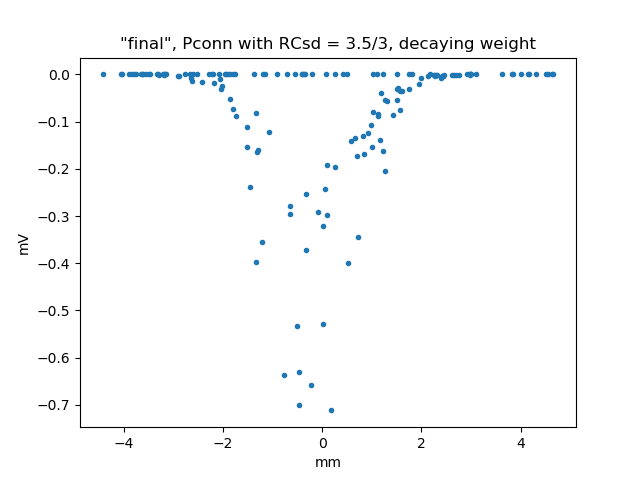

In [8]:
plt.figure()
plt.plot(distances, RIPSPs, '.')
plt.title('"final", Pconn with RCsd = 3.5/3, decaying weight')
plt.xlabel('mm')
plt.ylabel('mV')
plt.show()